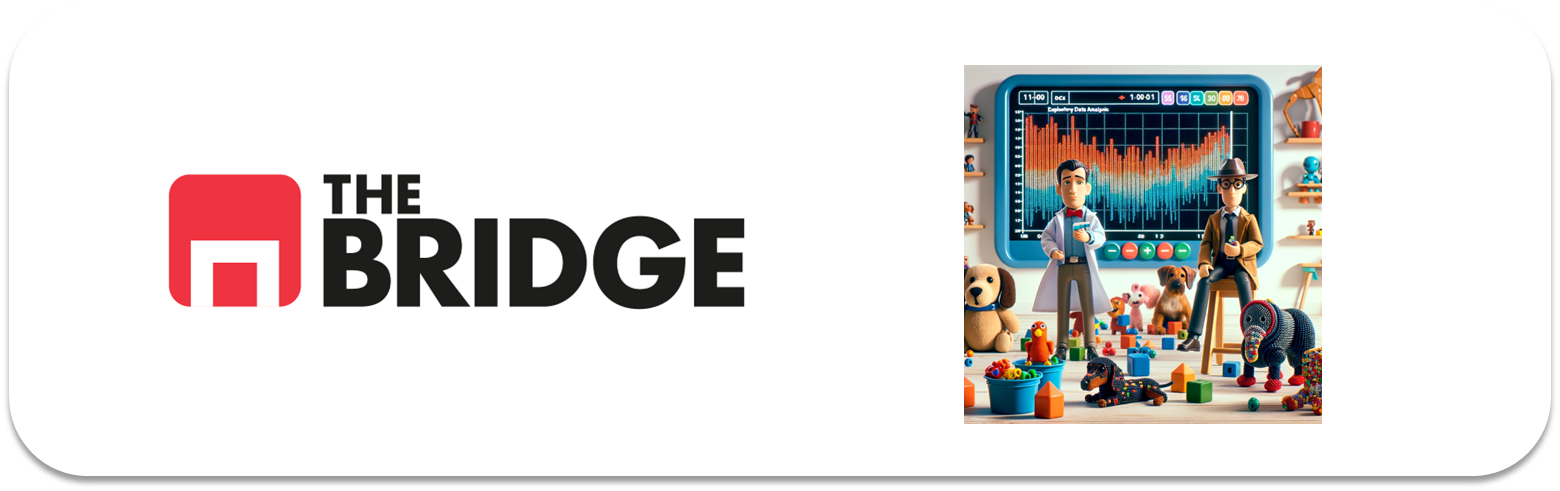

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"], inplace=True)
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
print("Suma de parientes de cada pasajero (parch y sibsp): ",df_titanic["parch"].sum()+df_titanic["sibsp"].sum())
# Crear la nueva columna "family_members" sumando "parch" y "sibsp"
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
# Eliminar las columnas "parch" y "sibsp"
df_titanic.drop(columns=["parch", "sibsp"], inplace=True)
df_titanic

Suma de parientes de cada pasajero (parch y sibsp):  806


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode()[0])
df_titanic["embark_town"].isna().value_counts() # Había dos valores nulos, ya no queda ninguno


embark_town
False    891
Name: count, dtype: int64

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [6]:
print("Media de edad por:",df_titanic.groupby("sex")["age"].mean())
df_titanic["age"] = df_titanic["age"].fillna(df_titanic.groupby("sex")["age"].transform("median"))
df_titanic["age"].isna().value_counts() # Comprobamos que ya no quedan nulos

Media de edad por: sex
female    27.915709
male      30.726645
Name: age, dtype: float64


age
False    891
Name: count, dtype: int64

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [7]:
# 1) Sobrevivieron más mujeres (233 niñas + 21 niños = 254), luego hombres adultos (88)
df_titanic.groupby(["adult_male","sex","alive"])["alive"].count()

adult_male  sex     alive
False       female  no        81
                    yes      233
            male    no        19
                    yes       21
True        male    no       449
                    yes       88
Name: alive, dtype: int64

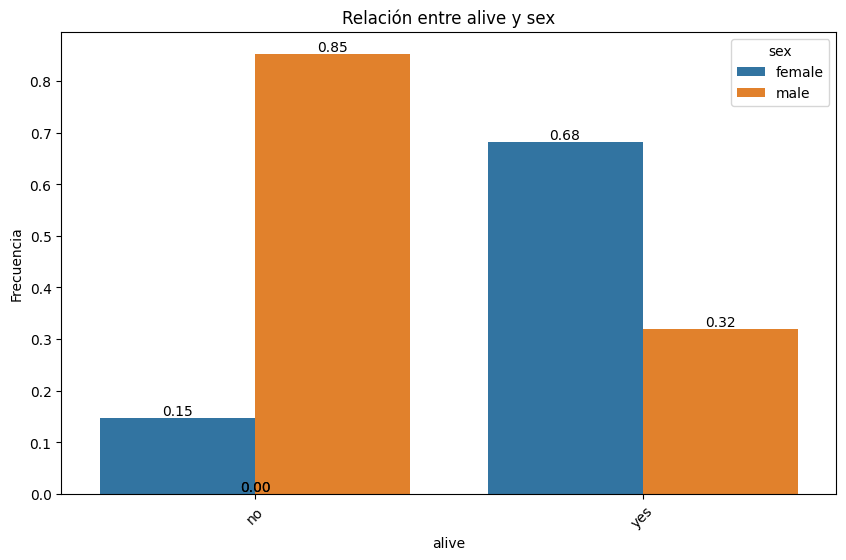

In [8]:
plot_categorical_relationship_fin(df_titanic, "alive","sex", relative_freq = True, show_values = True)

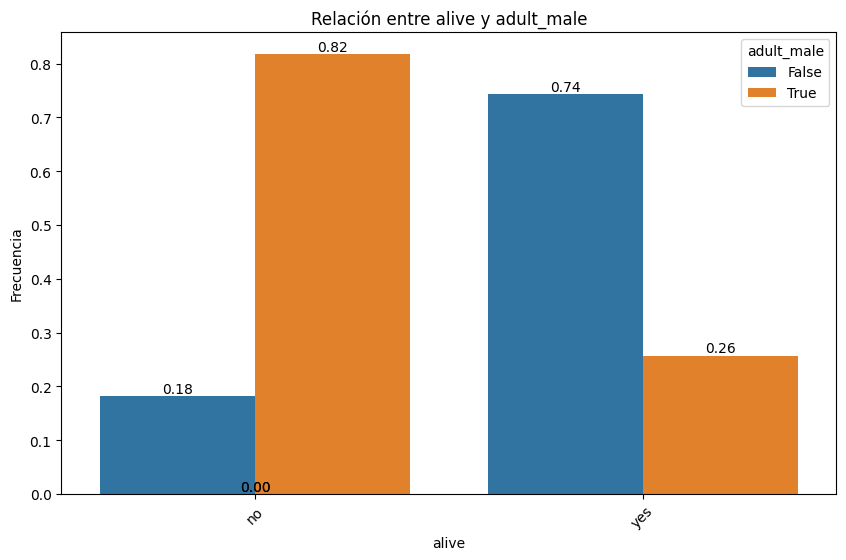

In [9]:
plot_categorical_relationship_fin(df_titanic, "alive","adult_male", relative_freq = True, show_values = True)

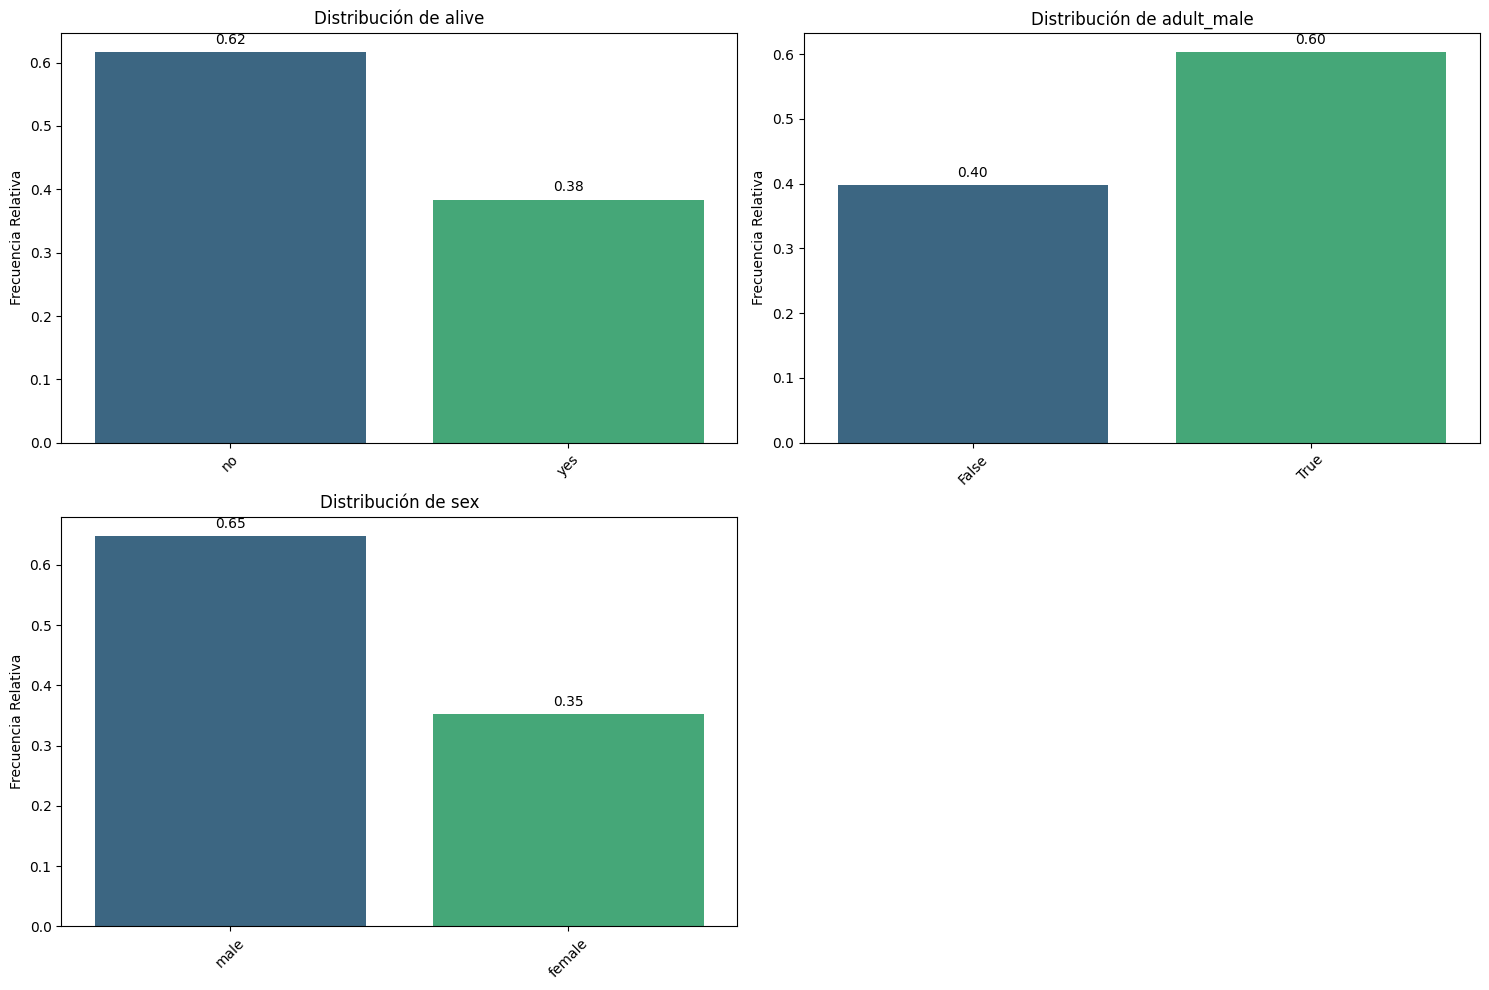

In [10]:
pinta_distribucion_categoricas(df_titanic,["alive","adult_male","sex"], relativa= True, mostrar_valores= True)

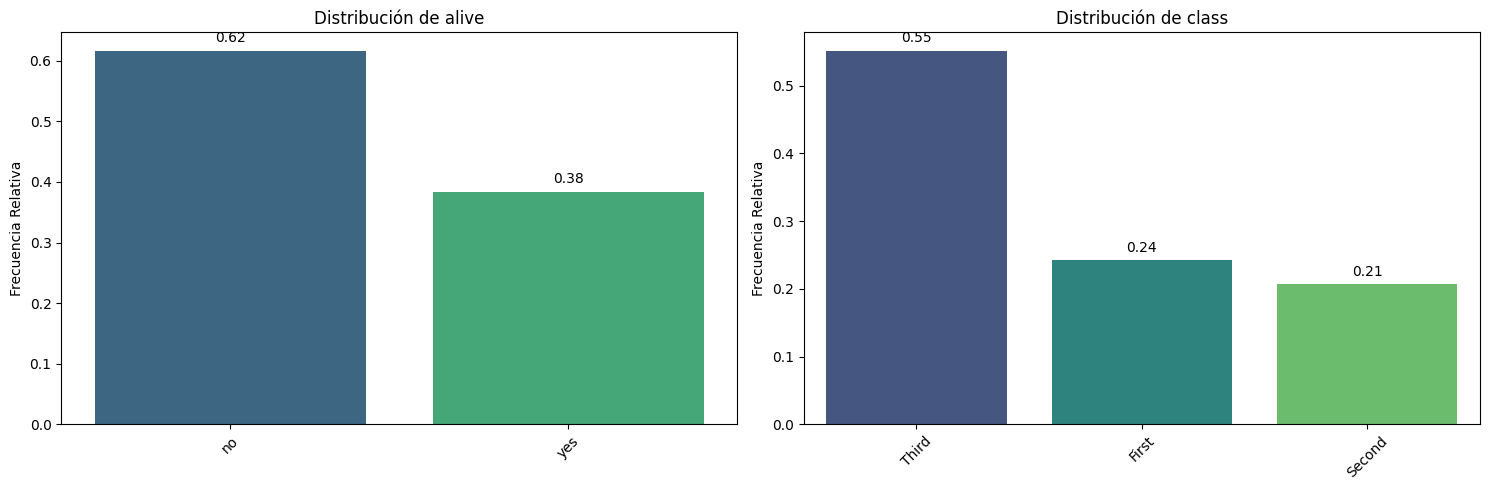

In [11]:
pinta_distribucion_categoricas(df_titanic,["alive","class"], relativa= True, mostrar_valores= True)

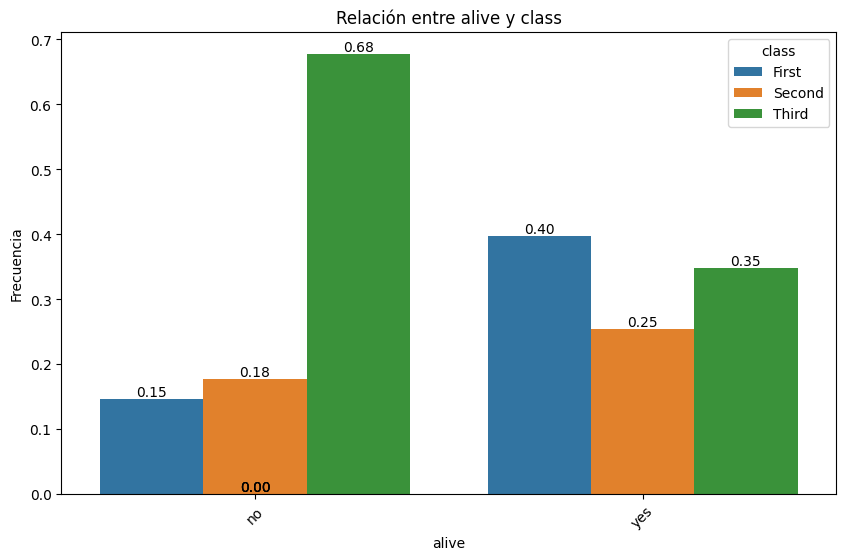

In [12]:
plot_categorical_relationship_fin(df_titanic, "alive","class", relative_freq = True, show_values = True)

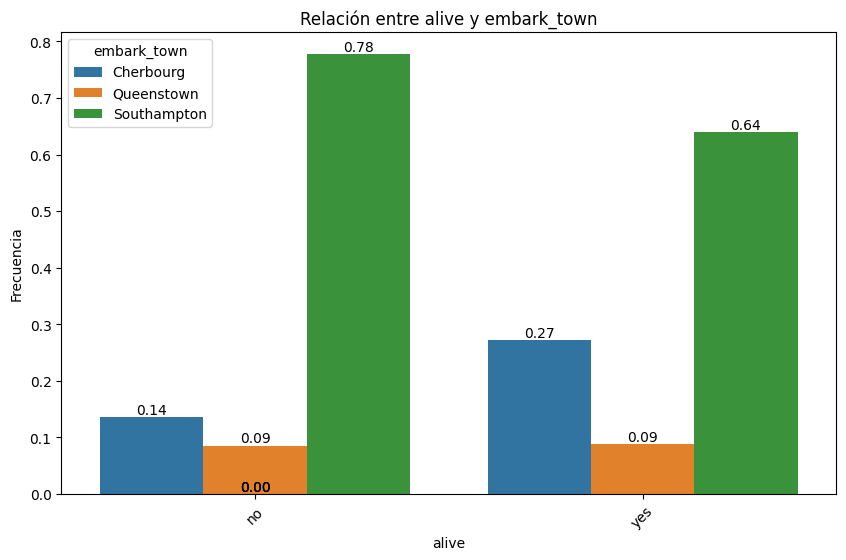

In [13]:
plot_categorical_relationship_fin(df_titanic, "alive","embark_town", relative_freq = True, show_values = True)

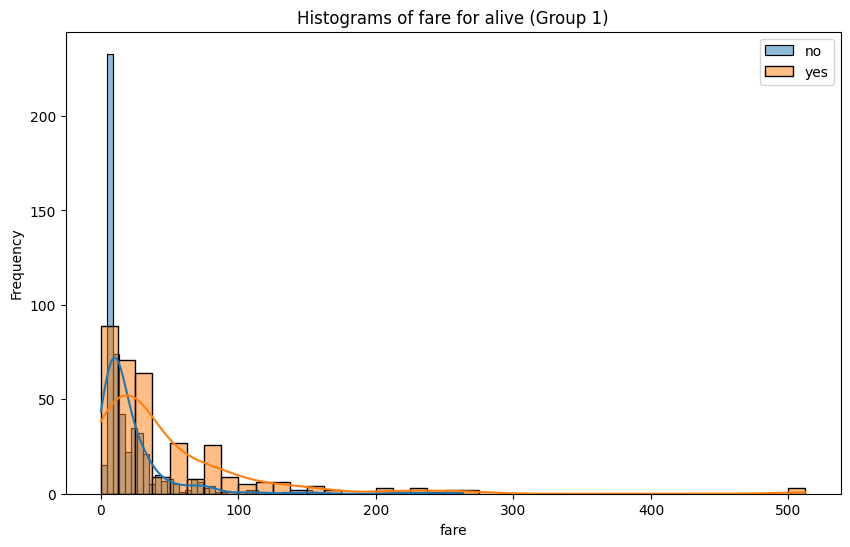

In [14]:
plot_grouped_histograms(df_titanic, "alive","fare",group_size= 2)

In [15]:
# 5) Existen pasajeros que no pagaron nada por el billete
print("Pasajeros que no pagaron por el billete:\n",df_titanic.loc[df_titanic["fare"] == 0])
print("\nPasajeros con el billete más caro:\n")
df_titanic.loc[df_titanic["fare"] == df_titanic["fare"].max()]

Pasajeros que no pagaron por el billete:
       sex   age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.0   0.0   Third  man        True  Southampton    no   True   
263  male  40.0   0.0   First  man        True  Southampton    no   True   
271  male  25.0   0.0   Third  man        True  Southampton   yes   True   
277  male  29.0   0.0  Second  man        True  Southampton    no   True   
302  male  19.0   0.0   Third  man        True  Southampton    no   True   
413  male  29.0   0.0  Second  man        True  Southampton    no   True   
466  male  29.0   0.0  Second  man        True  Southampton    no   True   
481  male  29.0   0.0  Second  man        True  Southampton    no   True   
597  male  49.0   0.0   Third  man        True  Southampton    no   True   
633  male  29.0   0.0   First  man        True  Southampton    no   True   
674  male  29.0   0.0  Second  man        True  Southampton    no   True   
732  male  29.0   0.0  Second  man        True

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


In [16]:
df_titanic.groupby(["fare","embark_town","alive"]).value_counts()

fare      embark_town  alive  sex     age   class   who    adult_male  alone  family_members
0.0000    Southampton  no     male    29.0  Second  man    True        True   0                 6
                                            First   man    True        True   0                 2
                                      19.0  Third   man    True        True   0                 1
                                      36.0  Third   man    True        True   0                 1
                                      38.0  First   man    True        True   0                 1
                                                                                               ..
263.0000  Southampton  yes    female  23.0  First   woman  False       False  5                 1
                                      24.0  First   woman  False       False  5                 1
512.3292  Cherbourg    yes    female  35.0  First   woman  False       True   0                 1
                         

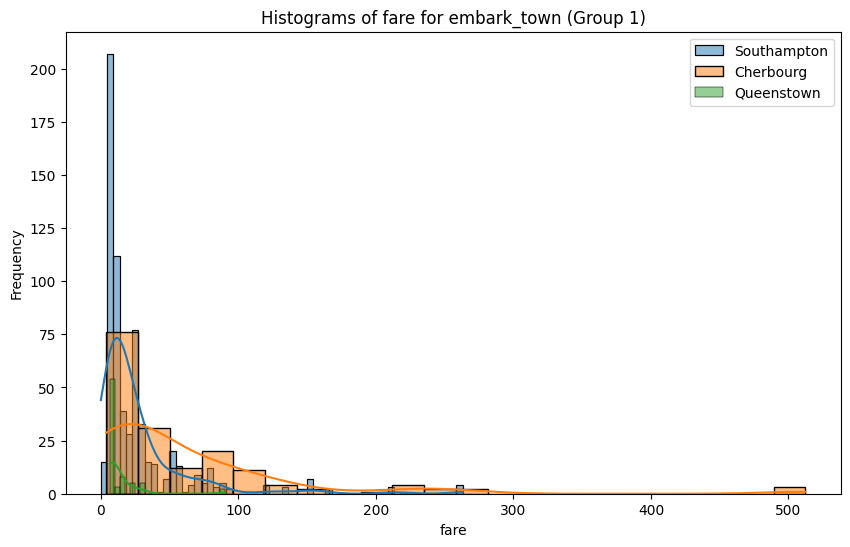

In [17]:
# 6) Principalmente los pasajeros que embarcaron en Southampton pagaron la tarifa más baja
plot_grouped_histograms(df_titanic,"embark_town","fare", 3)

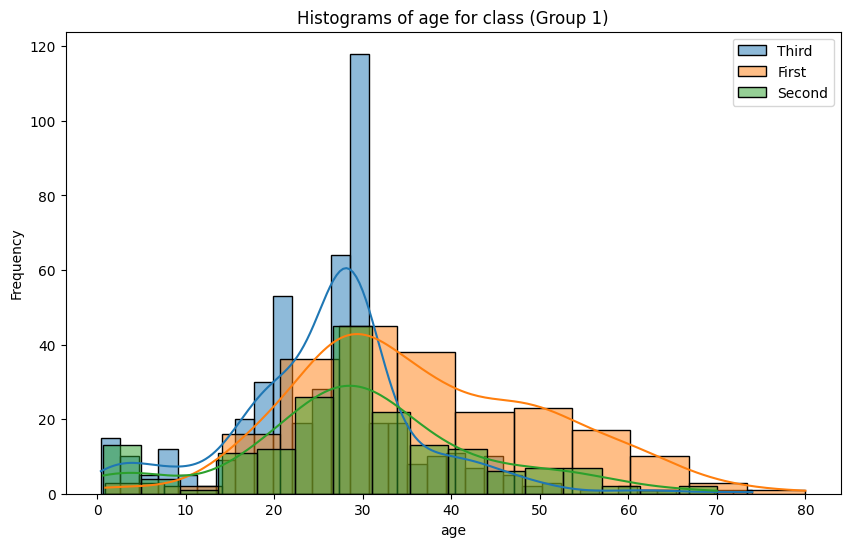

In [18]:
# 7) Obtenemos la relación de edad por clase
plot_grouped_histograms(df_titanic,"class","age", 3)

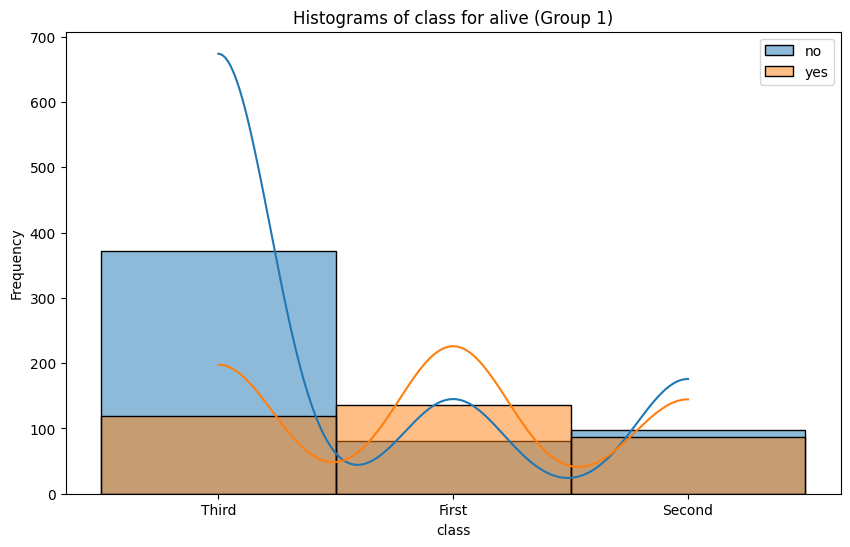

In [19]:
plot_grouped_histograms(df_titanic,"alive","class", 2)

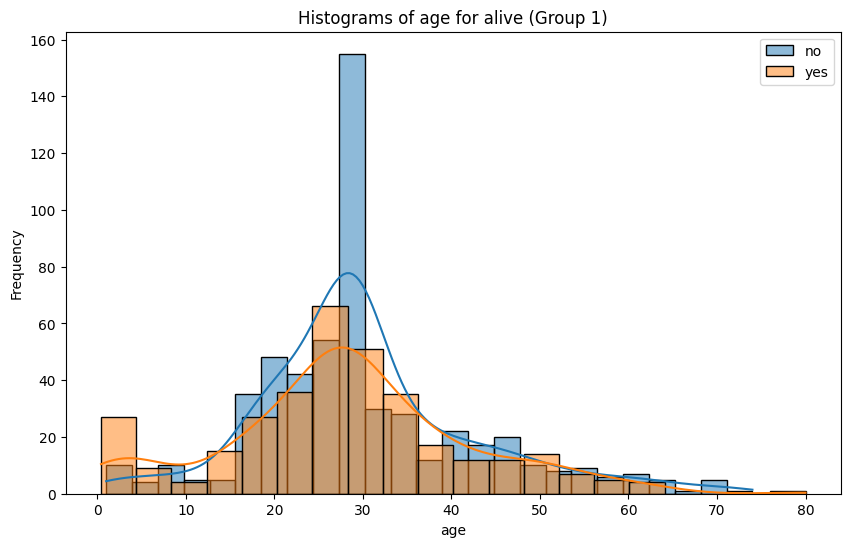

In [20]:
plot_grouped_histograms(df_titanic,"alive","age", 2)

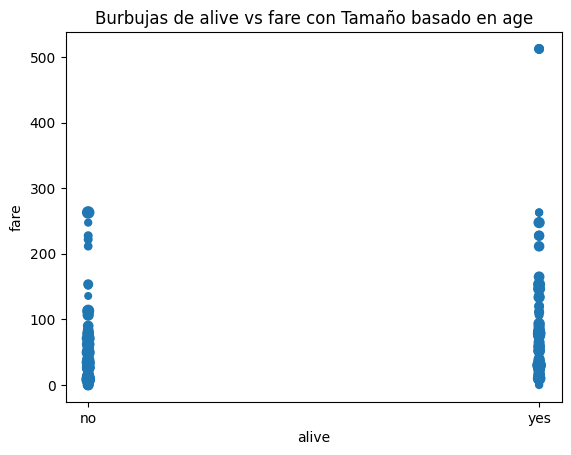

In [21]:
bubble_plot(df_titanic,"alive","fare","age", scale = 1)

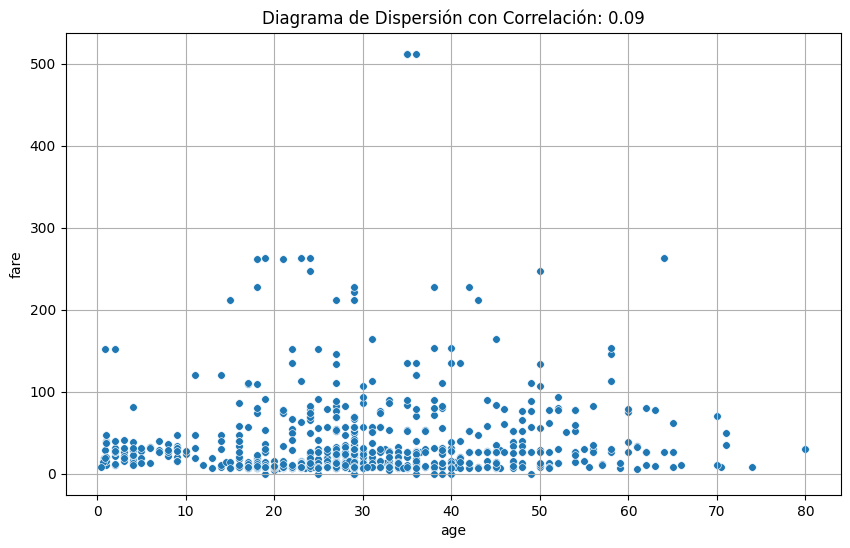

In [22]:
grafico_dispersion_con_correlacion(df_titanic,"age","fare", mostrar_correlacion= True, tamano_puntos= 30)

1) 
    - Sí, existe una relación significativa de supervivientes entre mujeres y hombres
    - Tambíen existe una relación significativa de supervivientes entre niños y adultos
2) 
    - En la clase que más han sobrevivido es en Primera
    - Es llamativo que tengan semejanza los supervivientes de Primera y Tercera Clase
3) 
    - El mayor número de supervivientes han embarcado desde Southampton
4) 
    - Las tarifas más baratas son las que tienen menos supervivientes
5) 
    - Entre todos los pasajeros (son hombres adultos que han embarcado desde Southampton) cuyo billete le ha salido gratis, sólo hay un superviviente
    - Las 3 personas que más pagaron por el billete sobrevivieron embarcando desde Cherbourg en primera Clase
6) 
    - Principalmente los pasajeros que embarcaron en Southampton pagaron la tarifa más baja
7) 
    - Hay una relación clara entre los supervivientes de Primera Clase y de media edad (entre 35 y 50 años)
8) 
    - El grágico indica que hay un 0,09 de correlación entre la edad y el precio del billete
    - No parece que haya una relación directa entre la edad y el precio de los billetes para los supervivientes / fallecimientos (son resultados semejantes)



## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [23]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

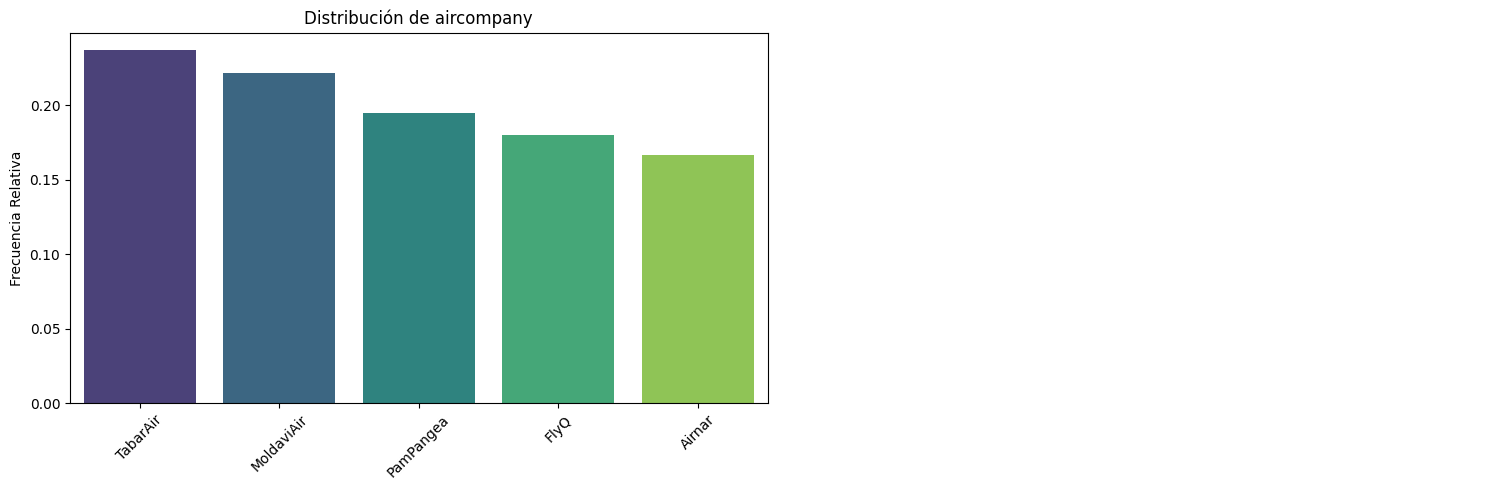

In [24]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True)

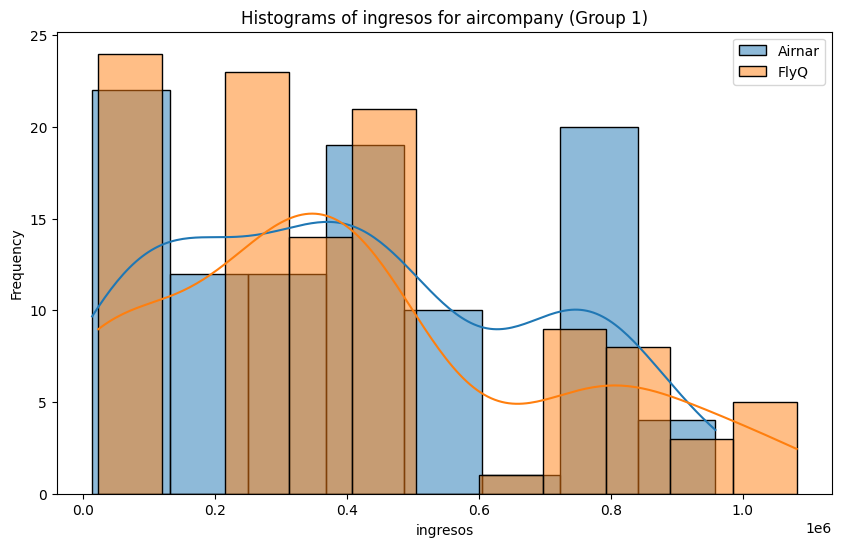

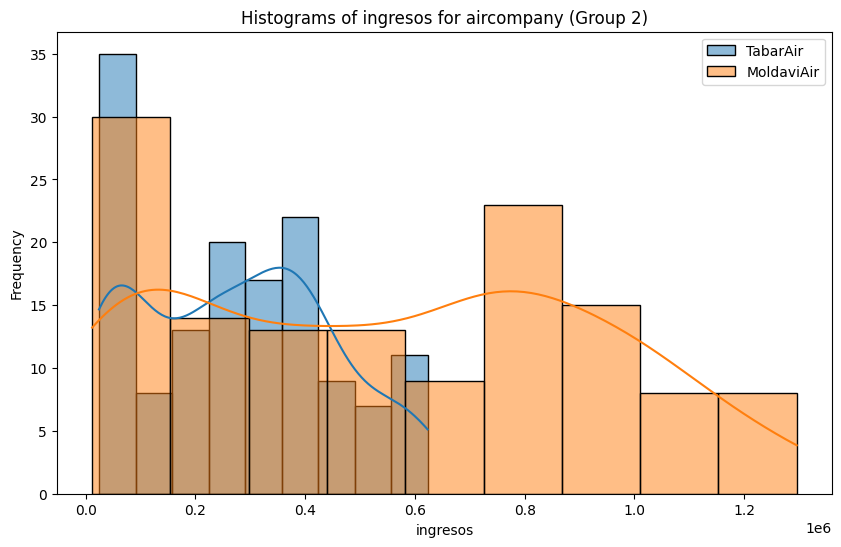

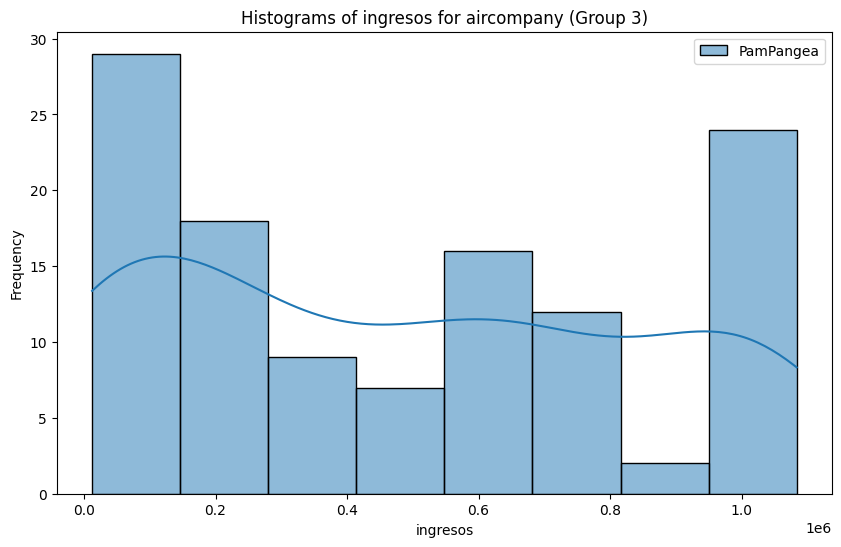

In [25]:
plot_grouped_histograms(df_air_jun, "aircompany","ingresos",group_size= 2)

- Los ingresos parecen ser diferentes para cada compañía

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


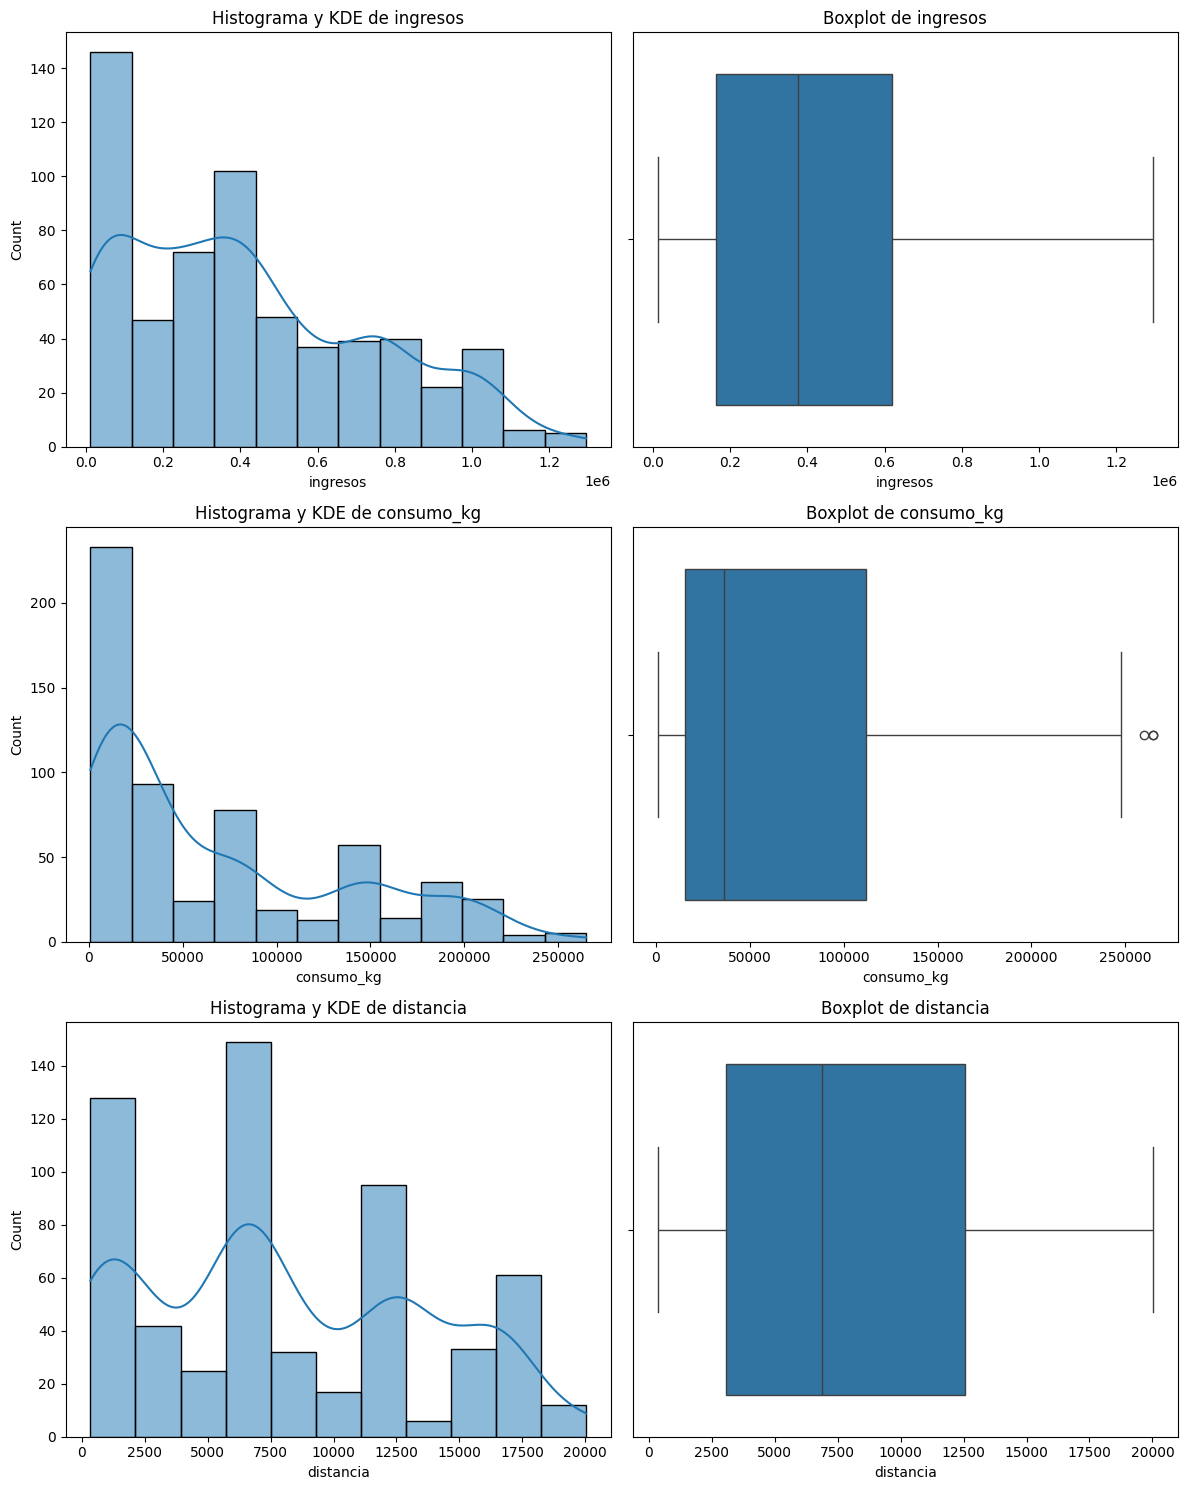

In [26]:
# Los viajes de corta-media distancia parecen tener un mayor ingreso que el resto

plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Realiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [27]:
# Forzamos que la columna "distancia" esté en formato numérico
df_air_jun["distancia"] = pd.to_numeric(df_air_jun["distancia"], errors="coerce")

df_air_jun.loc[df_air_jun["distancia"] < 5000, "cat_vuelo"] = "Corta Distancia"
df_air_jun.loc[(df_air_jun["distancia"] >= 5000) & (df_air_jun["distancia"] < 15000), "cat_vuelo"] = "Media Distancia"
df_air_jun.loc[df_air_jun["distancia"] >= 15000, "cat_vuelo"] = "Larga Distancia"
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,Corta Distancia
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,Media Distancia
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,Media Distancia
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,Media Distancia
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,Media Distancia
...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,Media Distancia
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,Corta Distancia
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,Media Distancia
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,Media Distancia


Respuesta Corta Distancia:


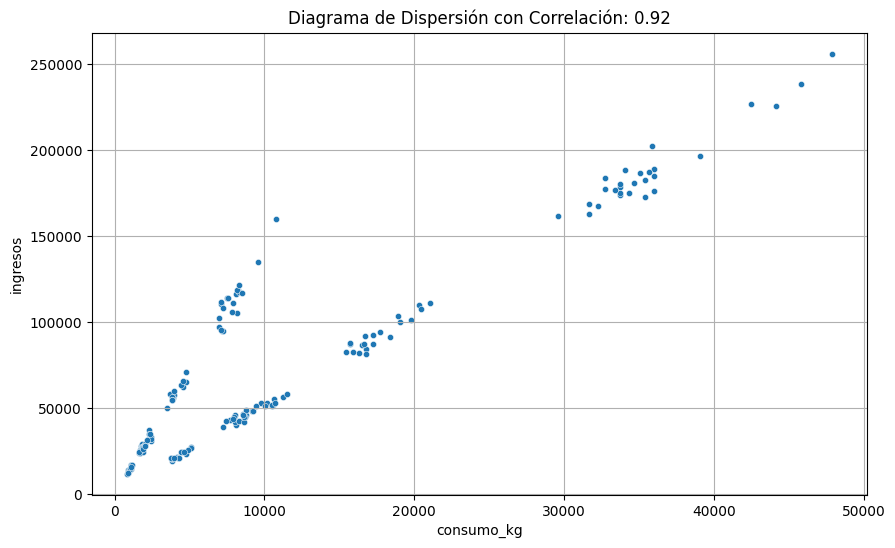

Respuesta Media Distancia:


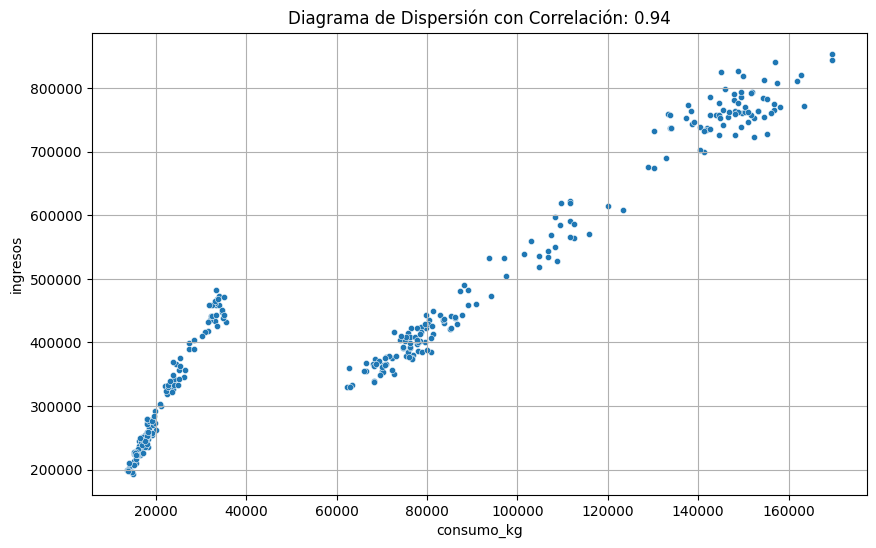

Respuesta Larga Distancia:


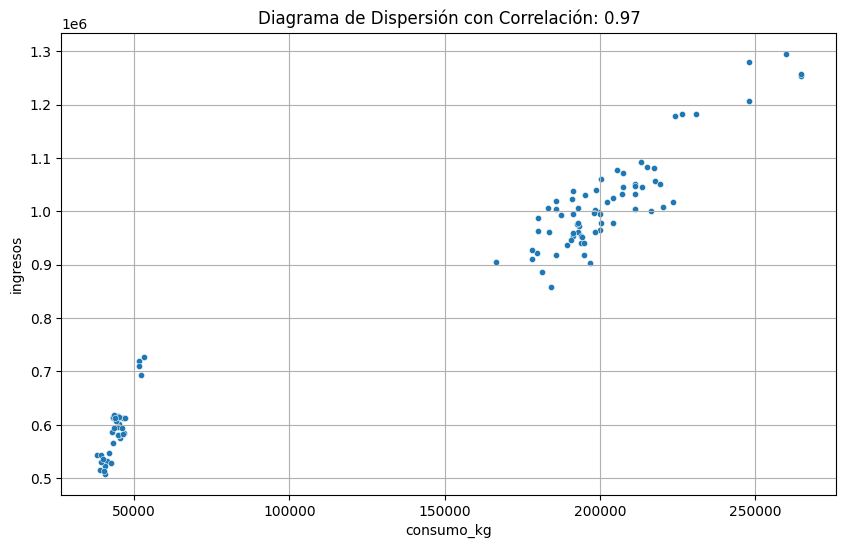

In [28]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]]

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

- Tiene una gran dispersión en los vuelos por distancias, pero con valores muy parecidos a los ingresos por consumo según la compañía

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.